Implementation
The convolutional autoencoder is implemented in Python3.8 using the TensorFlow 2.2 library.


First we are going to import all the library and functions that is required in building convolutional autoencoder.

In [0]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

Let us seed the environment and load the Fashion MNIST dataset.

In [2]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)
## Loading the dataset and then normalizing the images.
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


Now we specify the hyperparameters.

In [0]:
## Hyperparameters
H = 28
W = 28
C = 1
## Latent space
latent_dim = 128

Now we will build the model for the convolutional autoencoder. the inputs variable defined the input for the model which takes the input image while training.

In [0]:
inputs = Input(shape=(H, W, C), name="inputs")
x = inputs

The layers specified below forms the encoder for the convolutional autoencoder. The Conv2D layer learn the required features from the incoming image or feature maps.

In [0]:
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)
x = Flatten()(x)
units = x.shape[1]
x = Dense(latent_dim, name="latent")(x)
x = Dense(units)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

The layer specified below forms the decoder for the convolutional autoencder. The decoder is a mirror image of the encoder, except instead of using Conv2D layer, the Conv2DTranspose (Transpose Convolution) is used. The transpose convolution is used learns to increase the dimensions of the incoming feature maps.
At the last a sigmoid activation is used because we want the output value between 0 and 1.

In [0]:
x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)
outputs = x

The convolutional autoencoder is now complete and we are ready to build the model using all the layers specified above.

In [7]:
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256   

Now we start training the convolutional autoencoder using the Fashion MNIST dataset.

In [8]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 [==============================] - 124s 528ms/step - loss: 0.4641 - val_loss: 0.5113
Epoch 2/20
235/235 [==============================] - 124s 526ms/step - loss: 0.3890 - val_loss: 0.3935
Epoch 3/20
235/235 [==============================] - 123s 525ms/step - loss: 0.3511 - val_loss: 0.3519
Epoch 4/20
235/235 [==============================] - 123s 524ms/step - loss: 0.3266 - val_loss: 0.3251
Epoch 5/20
235/235 [==============================] - 123s 524ms/step - loss: 0.3098 - val_loss: 0.3085
Epoch 6/20
235/235 [==============================] - 123s 524ms/step - loss: 0.2978 - val_loss: 0.2996
Epoch 7/20
235/235 [==============================] - 123s 523ms/step - loss: 0.2889 - val_loss: 0.2884
Epoch 8/20
235/235 [==============================] - 123s 523ms/step - loss: 0.2821 - val_loss: 0.2828
Epoch 9/20
235/235 [==============================] - 123s 524ms/step - loss: 0.2768 - val_loss: 0.2796
Epoch 10/20
235/235 [==============================] - 124s 528m

After the training is complete, we can make predictions on the test dataset.

In [0]:
test_pred_y = autoencoder.predict(x_test)


After the output is generated on the test images, we will save some of the test images and its output for the comparison.

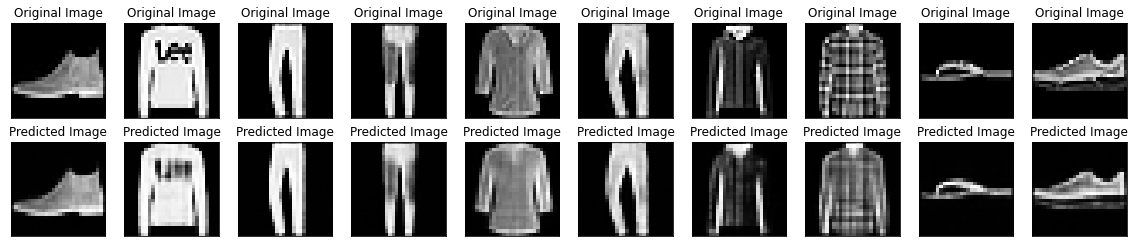

In [11]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.savefig("results/convolutonal_autoencoder.png")
